### Assignment 4
## Data Aggregation & Visualization

<br>
<strong>Team Member</strong>
</br>
- Tan Yong Sheng (A20EC0157)<br>
- Eddie Wong Chung Peng (A20EC0031)<br>
- Low Junyi (A20EC0071)

## TASK 1:
(a) Load Sales Data.csv, assign it into variable named sales. Display the first 10 rows of 
the sales

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sales = pd.read_csv("Sales Data.csv")
sales[:10]

month_number  facecream  facewash  toothpaste  bathingsoap  shampoo  \
0             1       2500      1500        5200         9200     1200   
1             2       2630      1200        5100         6100     2100   
2             3       2140      1340        4550         9550     3550   
3             4       3400      1130        5870         8870     1870   
4             5       3600      1740        4560         7760     1560   
5             6       2760      1555        4890         7490     1890   
6             7       2980      1120        4780         8980     1780   
7             8       3700      1400        5860         9960     2860   
8             9       3540      1780        6100         8100     2100   
9            10       1990      1890        8300        10300     2300   

   moisturizer  total_units  total_profit  
0         1500        21100        211000  
1         1200        18330        183300  
2         1340        22470        224700  
3         1130        22270        222700  
4         1740        20960        209600  
5         1555        20140        201400  
6         1120        20760        295500  
7         1400        25180        361400  
8         1780        23400        234000  
9         1890        26670        266700

 (b) Get total profit of all months and show line plot with the following style properties:
● Line Style dotted
● Line color should be red
● Line width should be 3
● Add a circle marker with size 8 and blue color
● Show legend at the lower right location.
● X label name = Month Number
● Y label name = Sold Unit number
● Title = Company Sales Per Month

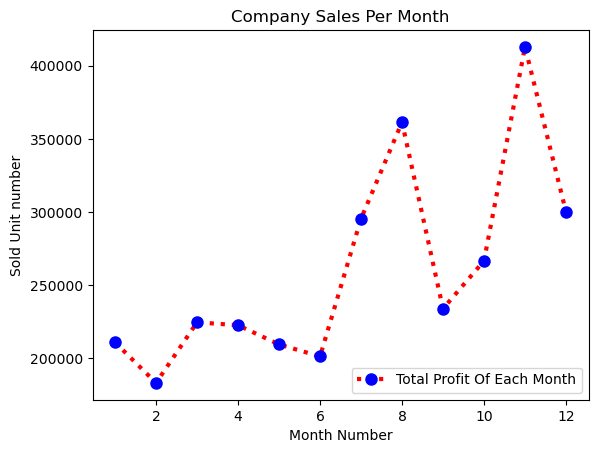

In [28]:
fig, ex = plt.subplots()
x = sales['month_number']
y = sales['total_profit']

ex.plot(x,y, label="Total Profit Of Each Month", color='red', linestyle='dotted', linewidth=3, marker='o', markersize=8, markerfacecolor="blue", 
          markeredgecolor="blue")
ex.legend(loc=4)
ex.set_title("Company Sales Per Month")
ex.set_xlabel("Month Number")
ex.set_ylabel("Sold Unit number");

(c) Read data from Sales Data.csv and show all product sales using a multiline plot, sized 
1200 × 600 pixels. Differentiate all the lines by line color and marker.

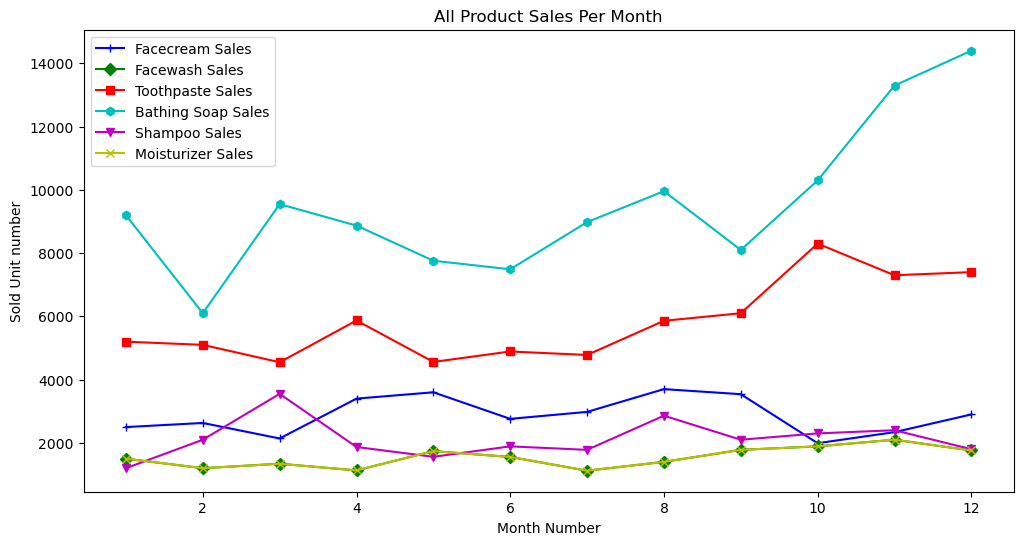

In [29]:
fig, ax = plt.subplots(figsize=(12,6))
x = sales['month_number']

ax.plot(x, sales['facecream'], color='b', marker='+', label="Facecream Sales")
ax.plot(x, sales['facewash'], color='g', marker='D', label="Facewash Sales")
ax.plot(x, sales['toothpaste'], color='r', marker='s', label="Toothpaste Sales")
ax.plot(x, sales['bathingsoap'], color='c', marker='h', label="Bathing Soap Sales")
ax.plot(x, sales['shampoo'], color='m', marker='v', label="Shampoo Sales")
ax.plot(x, sales['moisturizer'], color='y', marker='x', label="Moisturizer Sales")
ax.set_title("All Product Sales Per Month")
ax.set_xlabel("Month Number")
ax.set_ylabel("Sold Unit number");
ax.legend(loc=0);

(d) The products in the sales data can be further grouped as follow:
<br/> a. Category A: facecream, facewash, moisturizer
<br/> b. Category B: toothpaste
<br/> c. Category C: bathingsoap, shampoo

In [31]:
mapping = {'facecream': 'Category A', 'facewash': 'Category A', 'moisturizer': 'Category A', 
           'toothpaste': 'Category B', 
           'bathingsoap': 'Category C', 'shampoo' : 'Category C'}

by_category = sales.groupby(mapping, axis=1)
sales_category = by_category.sum()
sales_category['month_number'] = sales['month_number']
sales_category['Grand Total of Unit Sold'] = sales['total_units']
sales_category['A Percentage Unit Sold (%)'] = sales_category['Category A']/sales_category['Category A'].sum()*100
sales_category['B Percentage Unit Sold (%)'] = sales_category['Category B']/sales_category['Category B'].sum()*100
sales_category['C Percentage Unit Sold (%)'] = sales_category['Category C']/sales_category['Category C'].sum()*100
sales_category = sales_category.reindex(columns=['month_number','Category A','Category B','Category C','A Percentage Unit Sold (%)',
                                                 'B Percentage Unit Sold (%)','C Percentage Unit Sold (%)','Grand Total of Unit Sold'])
sales_category

month_number  Category A  Category B  Category C  \
0              1        5500        5200       10400   
1              2        5030        5100        8200   
2              3        4820        4550       13100   
3              4        5660        5870       10740   
4              5        7080        4560        9320   
5              6        5870        4890        9380   
6              7        5220        4780       10760   
7              8        6500        5860       12820   
8              9        7100        6100       10200   
9             10        5770        8300       12600   
10            11        6540        7300       15700   
11            12        6420        7400       16200   

    A Percentage Unit Sold (%)  B Percentage Unit Sold (%)  \
0                     7.691232                    7.438135   
1                     7.033981                    7.295094   
2                     6.740316                    6.508368   
3                     7.914977                    8.396510   
4                     9.900713                    6.522672   
5                     8.208642                    6.994707   
6                     7.299678                    6.837362   
7                     9.089638                    8.382206   
8                     9.928681                    8.725504   
9                     8.068802                   11.872407   
10                    9.145574                   10.441997   
11                    8.977765                   10.585038   

    C Percentage Unit Sold (%)  Grand Total of Unit Sold  
0                     7.459475                     21100  
1                     5.881509                     18330  
2                     9.396069                     22470  
3                     7.703342                     22270  
4                     6.684837                     20960  
5                     6.727873                     20140  
6                     7.717688                     20760  
7                     9.195237                     25180  
8                     7.316024                     23400  
9                     9.037441                     26670  
10                   11.260938                     29540  
11                   11.619567                     30020

Group the data accordingly and obtain the following information, then plot into two subplots: 
<br/> 1. total unit sold of each category for every month
<br/> 2. percentage of total unit sold of each category for every month over the grand total
of unit sold of that category.

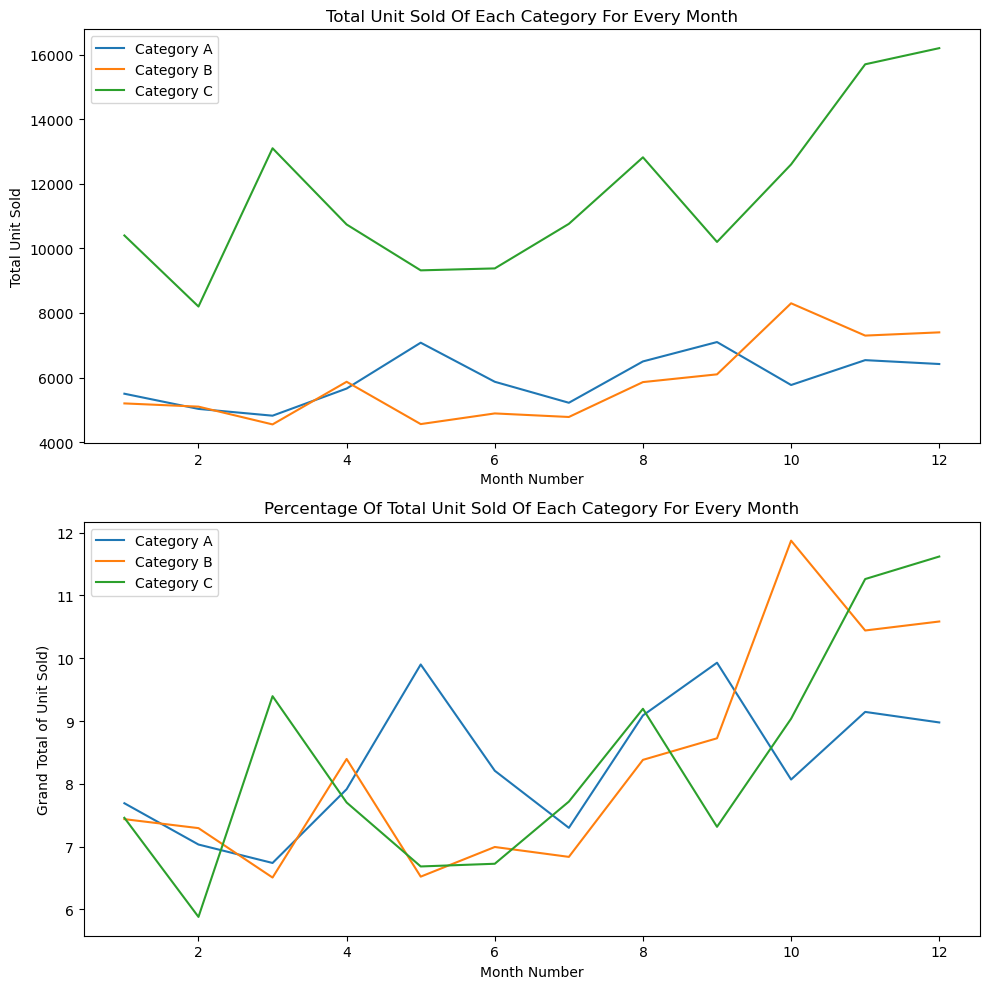

In [47]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
x = sales_category['month_number']

axes[0].plot(x, sales_category['Category A'], label="Category A")
axes[0].plot(x, sales_category['Category B'], label="Category B")
axes[0].plot(x, sales_category['Category C'], label="Category C")
axes[0].set_title("Total Unit Sold Of Each Category For Every Month")
axes[0].set_xlabel("Month Number")
axes[0].set_ylabel("Total Unit Sold");
axes[0].legend(loc=0);

axes[1].plot(x, sales_category['A Percentage Unit Sold (%)'], label="Category A")
axes[1].plot(x, sales_category['B Percentage Unit Sold (%)'], label="Category B")
axes[1].plot(x, sales_category['C Percentage Unit Sold (%)'], label="Category C")
axes[1].set_title("Percentage Of Total Unit Sold Of Each Category For Every Month")
axes[1].set_xlabel("Month Number")
axes[1].set_ylabel("Percentage Of Total Unit Sold (%)");
axes[1].legend(loc=0);
fig.tight_layout();


## TASK 2:

1. Read the three datasets given below and save the data into different DataFrame.
<br/> a. customer.csv
<br/> b. products.csv
<br/> c. sales.csv

In [35]:
customer = pd.read_csv("customer.csv")
products = pd.read_csv("products.csv")
sales = pd.read_csv("sales.csv")

customer

c_id Customer
0     1     Rabi
1     2     Raju
2     3     Alex
3     4     Rani
4     5     King
5     7     Ronn
6     8      Jem
7     9      Tom

In [36]:
products

p_id       product  price
0     1     Hard Disk     80
1     2           RAM     90
2     3       Monitor     75
3     4           CPU     55
4     5      Keyboard     20
5     6         Mouse     10
6     7   Motherboard     50
7     8  Power supply     20

In [37]:
sales

sale_id  c_id  p_id  product  qty store
0        1     2     3  Monitor    2   ABC
1        2     2     4      CPU    1   DEF
2        3     1     3  Monitor    3   ABC
3        4     4     2      RAM    2   DEF
4        5     2     3  Monitor    3   ABC
5        6     3     3  Monitor    2   DEF
6        7     2     2      RAM    3   ABC
7        8     3     2      RAM    2   DEF
8        9     2     3  Monitor    2   ABC

2. From the above datasets, produce a chart (any appropriate chart) for each below:
<br/> a. products sold by each store
<br/> b. quantity sold against each product
<br/> c. quantity and total sales against each product

In [38]:
# 2a.
pd.crosstab(sales["store"], sales["product"]).plot.bar(stacked=True, title="Products Sold By Each Store", ylabel="quantity");

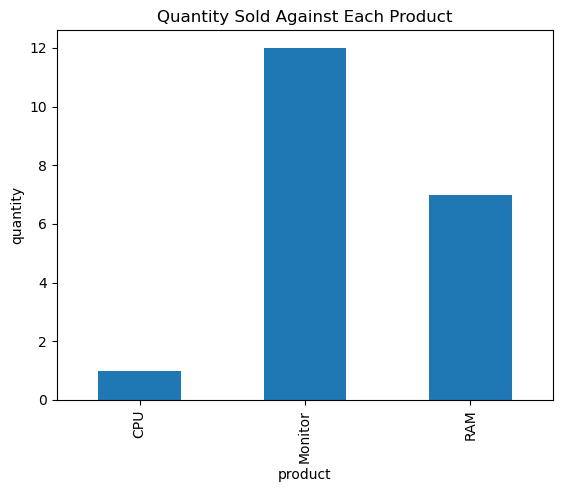

In [39]:
#2b.
df2 = sales.groupby('product')['qty'].sum()
df2.plot.bar(title="Quantity Sold Against Each Product", ylabel='quantity');

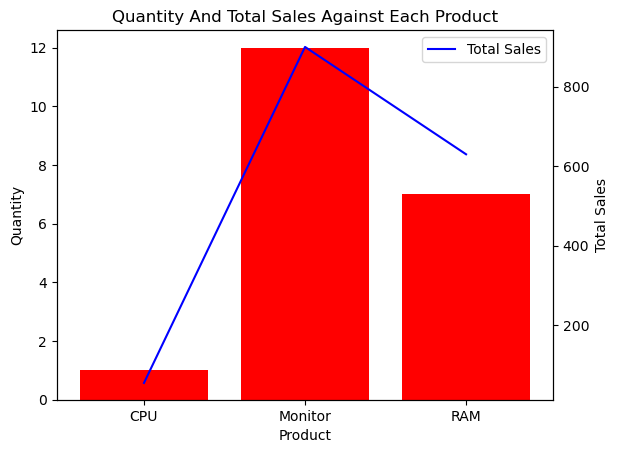

In [40]:
#2c.
df3 = sales.groupby(['product', 'p_id', 'store'])['qty'].sum()
df3
qtt_sales = pd.merge(df3, products, how = 'left', on = 'p_id')
qtt_sales['Total Sales'] = qtt_sales['qty'] * qtt_sales['price']
qtt_sales = qtt_sales.groupby('product').sum()
qtt_sales

fig, ex1 = plt.subplots()
x = qtt_sales.index
y = qtt_sales['qty']
z = qtt_sales['Total Sales']

ex1.bar(x,y, color='red', linestyle='-.')
ex1.set_title("Quantity And Total Sales Against Each Product")
ex1.set_xlabel('Product')
ex1.set_ylabel('Quantity')

ex2 = ex1.twinx()
ex2.plot(x,z, color='blue', linestyle='-', label="Total Sales")
ex2.set_ylabel('Total Sales')
ex2.legend(loc=0);

3. From the above datasets, produce an output for each below:
</br> a. quantity sold against each product against each store
</br> b. quantity sold against each store with total turnover of the store
</br> c. products which are not sold
</br> d. customers who have not purchased any product

In [41]:
#3a
sales.groupby(['store','product'])['qty'].sum()

store  product
ABC    Monitor    10
       RAM         3
DEF    CPU         1
       Monitor     2
       RAM         4
Name: qty, dtype: int64

In [42]:
#3b
df4 = pd.merge(sales, products)
df4
df4['Total Sales'] = df4['qty'] * df4['price']
df4.groupby(['store'])[['qty','Total Sales']].sum()

qty  Total Sales
store                  
ABC     13         1020
DEF      7          565

In [43]:
#3c
df5 = pd.merge(sales, products, how='outer')
df5['product'][df5['sale_id'].isna()]

9        Hard Disk
10        Keyboard
11           Mouse
12     Motherboard
13    Power supply
Name: product, dtype: object

In [44]:
#3d
df6 = pd.merge(sales, customer, how='outer')
df6['Customer'][df6['sale_id'].isna()]

9     King
10    Ronn
11     Jem
12     Tom
Name: Customer, dtype: object